In [61]:
import numpy as np
from scipy import signal
from scipy import linalg
from scipy.io import wavfile
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt

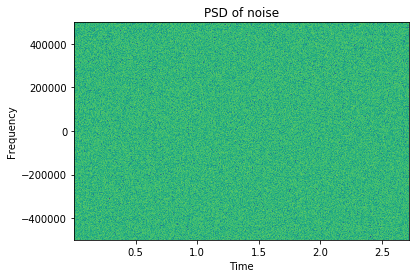

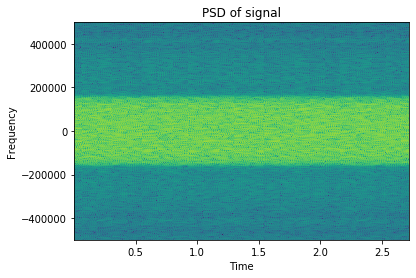

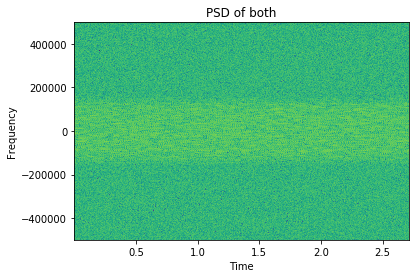

In [62]:
sample_rate_noise, raw_data_noise = wavfile.read("../samples/gnu_psk_noise.wav")
data_real_noise = raw_data_noise[:,0]
data_img_noise = raw_data_noise[:,1]
data_noise = data_real_noise + 1j*data_img_noise

plt.specgram(data_noise, NFFT=1024, Fs=sample_rate_noise)
plt.title("PSD of noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

sample_rate_signal, raw_data_signal = wavfile.read("../samples/gnu_psk_signal.wav")
data_real_signal = raw_data_signal[:,0]
data_img_signal = raw_data_signal[:,1]
data_signal = data_real_signal + 1j*data_img_signal

plt.specgram(data_signal, NFFT=1024, Fs=sample_rate_signal)
plt.title("PSD of signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

sample_rate_both, raw_data_both = wavfile.read("../samples/gnu_psk_both.wav")
data_real_both = raw_data_both[:,0]
data_img_both = raw_data_both[:,1]
data_both = data_real_both + 1j*data_img_both

plt.specgram(data_both, NFFT=1024, Fs=sample_rate_both)
plt.title("PSD of both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [63]:
len(data_noise)
data_noise = data_noise[int(10e4):int(11e4)]
data_signal = data_signal[int(10e4):int(11e4)]
data_both = data_both[int(10e4):int(11e4)]

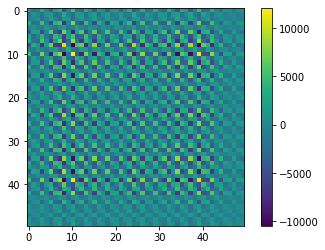

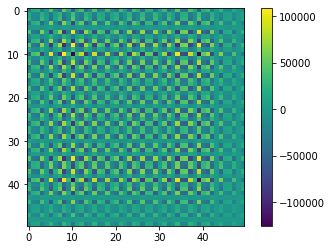

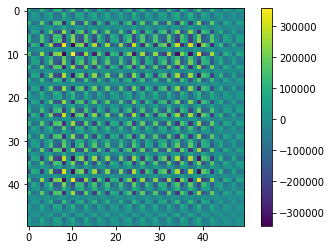

Noise only: 4.845130996651777e-06
Signal only: -5.874434476277978e-07
Noise and signal: 1.7940303651812675e-07
Diff: -4.665727960133651e-06


In [64]:
def processing_vec(y, t, l):
    return y[t:(t+l)]

def mult(y, t, l):
#     return np.dot(processing_vec(y, t, l), processing_vec(y, t, l).T)
    return np.outer(processing_vec(y, t, l), processing_vec(y, t, l)) 

def cal(y, l):
    y = y.reshape((-1, 1))
    r = np.zeros((l, l), dtype=complex)
    for i in range(0, len(y)-l):
        r += mult(y, i, l)
    return r / (len(y)-l)

l = 50
c_noise = np.abs(cal(data_noise, l))
c_signal = np.abs(cal(data_signal, l))
c_both = np.abs(cal(data_both, l))


q = np.sqrt(c_noise)
q_inv = np.linalg.inv(q)

c_noise = np.matmul(np.matmul(q_inv, c_noise), q_inv)
c_signal = np.matmul(np.matmul(q_inv, c_signal), q_inv)
c_both = np.matmul(np.matmul(q_inv, c_both), q_inv)


plt.imshow(c_noise)
plt.colorbar()
plt.show()

plt.imshow(c_signal)
plt.colorbar()
plt.show()

plt.imshow(c_both)
plt.colorbar()
plt.show()

def test1(x):
    t1 = x.sum()
    t2 = x.trace()
    return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.max(eig)
    eig_min = np.min(eig)
    return eig_max/eig_min
    
print(f"Noise only: {test1(c_noise)}")
print(f"Signal only: {test1(c_signal)}")
print(f"Noise and signal: {test1(c_both)}")
print(f"Diff: {test1(c_both)-test1(c_noise)}")

In [65]:
# q = np.sqrt(c_noise)
# q_inv = np.linalg.inv(q)

# c_noise_clean = np.matmul(np.matmul(q_inv, c_noise), q_inv)

# plt.imshow(c_noise_clean)
# plt.colorbar()
# plt.show()

# print(f"Noise only: {test1(c_noise_clean)}")
# # c_noise_clean = 